![Logo 1](img/aitech-logotyp-1.jpg)
<div class="alert alert-block alert-info">
<h1> Widzenie komputerowe </h1>
<h2> 01. <i>Wprowadzenie do widzenia komputerowego</i> [laboratoria]</h2> 
<h3>Andrzej Wójtowicz (2021)</h3>
</div>

![Logo 2](img/aitech-logotyp-2.jpg)

# Biblioteka OpenCV

Podczas zajęć będziemy poruszali zagadnienia związane z [widzeniem komputerowym](https://en.wikipedia.org/wiki/Computer_vision) (ang. *computer vision*, CV). Tę tematykę możemy traktować jako rozwinięcie, czy też bardziej zaawansowaną formę [prztwarzania obrazów](https://en.wikipedia.org/wiki/Digital_image_processing) (ang. *image processing*, IP), gdzie tym razem będziemy starali się wyciągnąć pewną bardziej zaawansowaną wiedzę płynącą z obrazów statycznych lub wideo (cf. dyskusja na [Artificial Intelligence Stack Exchange](https://ai.stackexchange.com/a/13588)). Przedmiot ma formę laboratoryjną, zatem główną dyskusję dotyczącą zakresu obu dziedzin zostawimy w ramach dodatkowej literatury uzupełniającej.

Standardem dla algorytmów z dziedzin IP/CV jest biblioteka [OpenCV](https://opencv.org/), która implementuje wiele z tych algorytmów oraz jest aktywnie rozwijana przez społeczność. Sama biblioteka posiada interfejsy do wielu języków programowania, natomiast my skupimy się na języku [Python](https://www.python.org/), który będzie dla nas idealny na potrzeby intensywnego prototypowania. Dokumentację online będzie głównie prowadziła do języka C++, ponieważ nie ma dedykowanej online dla Pythona, ale argumenty funkcji i metod są analogiczne.

Początkowe zajęcia będą głównie dotyczyły zagadnień IP, tak aby zapoznać się z biblioteką OpenCV, a dalsze zajęcia będą już związane z CV.

## Instalacja

Materiały do zajęć Jupyter Notebook są tworzone na serwerze JupyterHub z kernelem Python 3. Pominiemy tutaj tworzenie wirtualnego środowiska, jednak należy mieć na uwadze, że poniższe polecenia mogą być też przydatne podczas próby uruchomienia notebooków lub programów na własnym komputerze.

Poniższe polecenie wyświetla używaną wersję Pythona:

In [80]:
import platform
print(platform.python_version())

3.7.12


Niezbędne moduły zainstalujemy poprzez menadżer `pip`. Sama biblioteka OpenCV, abstrahując od np. paczek debianowych, posiada [4 możliwe opcje instalacji](https://pypi.org/project/opencv-contrib-python/). My zainstalujemy pełną wersję tej biblioteki, a dodatkowo doinstalujemy pakiety związane m.in. wyświetlaniem grafiki oraz uczeniem maszynowym.

In [81]:
# !pip3 install --user --disable-pip-version-check opencv-contrib-python==4.5.3.56 numpy scipy matplotlib scikit-learn

Sama biblioteka posiada też własne moduły związane z wyświetlaniem grafiki (moduł *HighGUI*) oraz z uczeniem maszynowym (moduł *ml*), jednak my raczej nie będziemy z nich korzystać podczas zajęć (aczkolwiek mogą być przydatne podczas realizacji projektu).

Wszystkie moduły, algorytmy i zmienne są dostępne z poziomu modułu `cv2`:

In [82]:
import cv2 as cv

Poniższym poleceniem możemy również sprawdzić wersję zainstalowanej biblioteki:

In [83]:
print(cv.__version__)

3.4.2


## Obrazy jako tablice

Obraz możemy traktować jako standardową tablicę [NumPy](https://www.numpy.org/) zawierającą dane dotyczące danych pikseli. Im większa liczba pikseli w obrazie, tym większa jest jego rozdzielczość. Intuicyjnie można przyjąć, że piksele są niewielkimi blokami informacji ułożonymi w postaci siatki dwuwymiarowej, a głębokość piksela odnosi się do informacji o kolorze. Aby obraz mógł być przetworzony przez komputer, to taki obraz musi zostać przekonwertowany na postać binarną. Kolor obrazu można obliczyć w następujący sposób:

Liczba kolorów (odcieni) = 2<sup>*bpp*</sup>, gdzie *bpp* oznacza bity na piksel.

Większa liczba bitów na piksel daje więcej możliwych kolorów na obrazach.

| Bity na piksel | Liczba kolorów |
| :------------: | :------------: |
|        1       |   2<sup>1</sup> = 2      |
|        2       |   2<sup>2</sup> = 4      |
|        3       |   2<sup>3</sup> = 8      |
|        4       |   2<sup>4</sup> = 16     |
|        8       |   2<sup>8</sup> = 256    |
|       16       |   2<sup>16</sup> = 65536 |

Spójrzmy na trzy typowe reprezentacje obrazów.

### Obraz czarno-biały

Obraz binarny składa się z 1 bita na piksel, a więc może mieć tylko dwa możliwe kolory, tj. czarny lub biały. Kolor czarny jest reprezentowany przez wartość 0, a 1 oznacza biel (czasem w użyciu są reprezentacje, które mają odwrotne wartości czerni i bieli).

![Obraz czarno-biały jako tablica bitów](img/binary-image.png)

### Obraz w skali odcieni szarości

Obraz w skali szarości składa się z 8 bitów na piksel. Oznacza to, że może mieć 256 różnych odcieni, przy czym 0 pikseli będzie reprezentować kolor czarny, a 255 oznacza biel.

![Przykładowy obraz w skali odcieni szarości](img/lena-grayscale.png)

### Obraz kolorowy

Kolorowe obrazy w standardowej formie są reprezentowane jako połączenie barwy czerwonej, niebieskiej i zielonej - wszystkie inne kolory można uzyskać, mieszając te podstawowe kolory we właściwych proporcjach.

![Składowe RGB](img/rgb-colors.png)

Kolorowy obraz składa się również z 8 bitów na piksel, z tym że na taki obraz składają się 3 kanały (czerwony, zielony i niebieski). W rezultacie 256 różnych natężeń danego koloru podstawowego można przedstawić za pomocą 0 oznaczającego najmniej intensywny i 255 najbardziej intensywny. Dla poniższego obrazu pawiana:

![Obraz pawiana](img/baboon.png)

podstawowe parametry dotyczące wymiarów prezentują się następująco:

```plaintext
Shape
(288, 289, 3)
288: Pixel height (wysokość w pikselach)
289: Pixel width (szerokość w pikselach)
3: color channel (liczba kanałów)
```

Taki obraz możemy reprezentować w postaci trójwymiarowej tablicy:

![Kanały RGB obrazu pawiana](img/baboon-3d.png)

## Wczytywanie obrazów

Przy użyciu funkcji [`cv.imread()`](https://docs.opencv.org/4.5.3/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) możemy odczytać obraz. Pierwszy argument to lokalizacja pliku. Obraz powinien znajdować się w katalogu roboczym lub powinna zostać podana ścieżka bezwzględna do pliku.

Drugi argument (opcjonalny) jest flagą oznaczającą w jaki sposób obraz powinien zostać wczytany:

* [`cv.IMREAD_COLOR`](https://docs.opencv.org/4.5.3/d4/da8/group__imgcodecs.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822) - wczytuje kolorowy obraz z pominięciem przezroczystości; flaga domyślna,
* [`cv.IMREAD_GRAYSCALE`](https://docs.opencv.org/4.5.3/d4/da8/group__imgcodecs.html#gga61d9b0126a3e57d9277ac48327799c80ae29981cfc153d3b0cef5c0daeedd2125) : wczytuje obraz w skali odcieni szarości,
* [`cv.IMREAD_UNCHANGED`](https://docs.opencv.org/4.5.3/d4/da8/group__imgcodecs.html#gga61d9b0126a3e57d9277ac48327799c80aeddd67043ed0df14f9d9a4e66d2b0708) : wczytuje obraz razem z kanałem alfa (przezroczystość).

Zamiast trzech powyższych flag można alternatywnie przekazać odpowiednio 1, 0 lub -1.

In [84]:
image = cv.imread("img/baboon.png", cv.IMREAD_COLOR)

Sprawdźmy typ zmiennej:

In [85]:
print(type(image))

<class 'numpy.ndarray'>


Sprawdźmy kształt tablicy:

In [86]:
print(image.shape)

(288, 289, 3)


[Typ danych](https://numpy.org/doc/stable/user/basics.types.html) tablicy:

In [87]:
print(image.dtype)

uint8


Jak widać, poszczególne piksele na kanałach są 8-bitowymi liczbami całkowitymi bez znaku.

## Wyświetlanie obrazów przy pomocy Matplotlib

W notebooku Jupyter najwygodniej wyświetla się obrazy przy pomocy biblioteki [Matplotlib](https://matplotlib.org/), a dokładniej modułu `pyplot`:

In [88]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Przed wyświetleniem obrazu musimy dokonać drobnej konwersji obrazu. OpenCV domyślnie wczytuje obraz w formacie BGR, natomiast Matplotlib pracuje na obrazie w formacie RGB. Do konwersji użyjemy funkcji [`cv.cvtColor()`](https://docs.opencv.org/4.5.3/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab), której pierwszym argumentem jest konwertowany obraz, a drugim sposób konwersji (w tym wypadku definiowany przez stałą [`cv.COLOR_BGR2RGB`](https://docs.opencv.org/4.5.3/d8/d01/group__imgproc__color__conversions.html#gga4e0972be5de079fed4e3a10e24ef5ef0ad3db9ff253b87d02efe4887b2f5d77ee)). *Nota bene*, czasami lepiej jest operować w przestrzeni barw [HSV](https://pl.wikipedia.org/wiki/HSV_(grafika)) niż RGB.

In [89]:
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

Po przekonwertowaniu obrazu możemy wyświetlić go przy pomocy `pyplot`. Użyjemy do tego funkcji [`matplotlib.pyplot.imshow()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow):

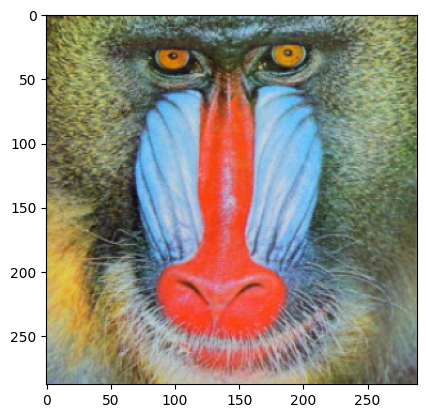

In [90]:
plt.imshow(image2)

Zwróćmy uwagę, że piksel o współrzędnych `(0, 0)` znajduje się w lewym górnym rogu.

Można też obejść się bez konwersji i po prostu odwrócić w locie kanały w tablicy `numpy`:

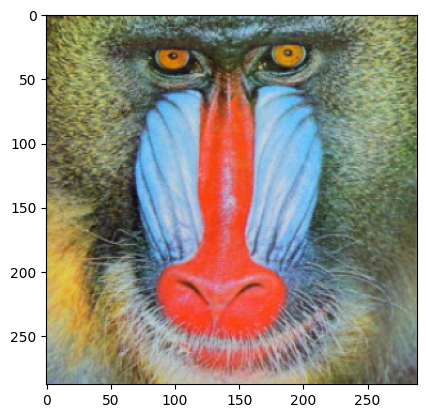

In [91]:
plt.imshow(image[..., ::-1])

Sprawdźmy kolejny plik:

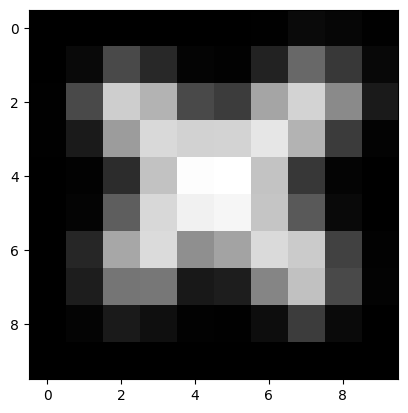

In [92]:
x_small = cv.imread("img/x_small.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(x_small, cmap = 'gray');

Wczytaliśmy obraz w skali odcieni szarości. Podczas wyświetlania obrazu możemy ustawić mapę kolorów (parametr `cmap`). Dodatkowo, jeśli na końcu polecenia damy średnik (`;`), to w wynikowej komórce notebooka nie będzie się wyświetlał zwracany typ.

Czasami warto również wyświetlić pasek z informacją o tym jaka wartość odpowiada za dany odcień:

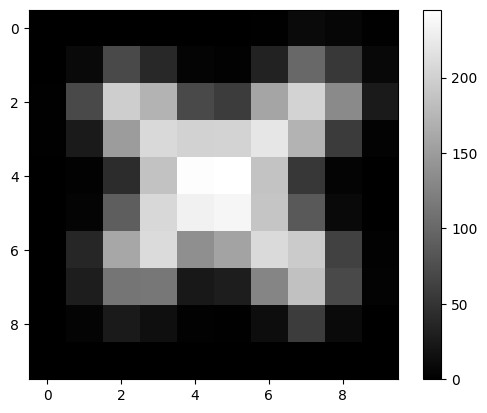

In [93]:
plt.imshow(x_small, cmap = 'gray');
plt.colorbar();

## Proste operacje

Możemy sprawdzić, że obraz jest w istocie tablicą NumPy o wartościach w zakresie od 0 do 255:

In [94]:
print(x_small)

[[  0   0   0   0   0   0   1  10   6   1]
 [  0   9  71  39   4   2  33 100  54   8]
 [  1  70 198 173  71  58 158 202 133  25]
 [  1  25 150 208 201 203 221 172  57   3]
 [  0   2  43 186 243 245 187  53   4   0]
 [  0   4  90 207 231 236 189  87   9   0]
 [  0  37 160 210 137 156 209 195  63   2]
 [  0  28 112 114  23  28 128 185  71   3]
 [  0   4  25  15   2   1  13  58  10   0]
 [  0   0   0   0   0   0   0   0   0   0]]


Wracając do samej biblioteki Matplotlib, możemy również np. sterować rozmiarem wyświetlanego obrazu oraz nadać mu tytuł:

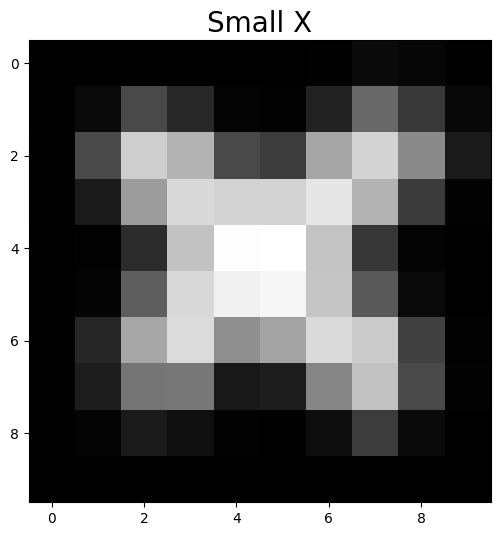

In [95]:
plt.figure(figsize = [6, 6])
plt.imshow(x_small, cmap = 'gray')
plt.title('Small X', fontsize = 20);

Niektóre parametry Matlplotlib (np. `figsize`) możemy ustawić na domyślne przy pomocy [`matplotlib.rcParams`](https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlib-rcparams).

Podczas wczytywania obrazów zawierających przezroczystość należy zwrócić uwagę na sposób wczytywania obrazu:

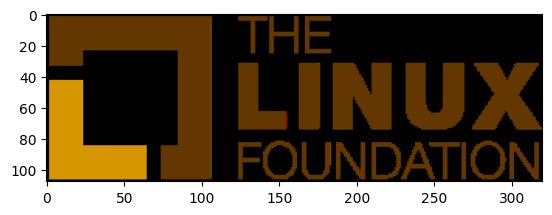

In [96]:
img_lfl = cv.imread("img/linux_foundation.png", cv.IMREAD_COLOR)
plt.imshow(img_lfl);

Mamy tutaj obraz 4-kanałowy, przez co musimy go wczytać jako `cv.IMREAD_UNCHANGED`, no i dodatkowo odpowiednio go przekonwertować:

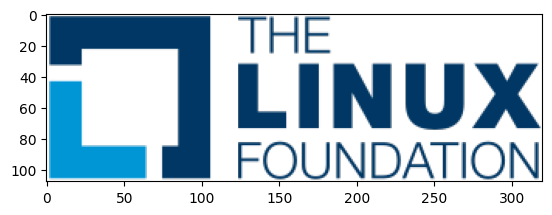

In [97]:
img_lfl = cv.imread("img/linux_foundation.png", cv.IMREAD_UNCHANGED)
plt.imshow(cv.cvtColor(img_lfl, cv.COLOR_BGRA2RGBA));

Możemy również podzielić obraz na poszczególne kanały i ew. ponownie je połączyć, odpowiednio przy pomocy funkcji [`cv.split()`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a) i [`cv.merge()`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga7d7b4d6c6ee504b30a20b1680029c7b4):

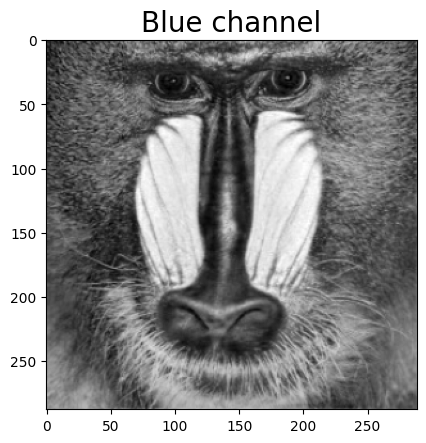

In [98]:
b, g, r = cv.split(image)
plt.imshow(b, cmap = 'gray')
plt.title('Blue channel', fontsize = 20);

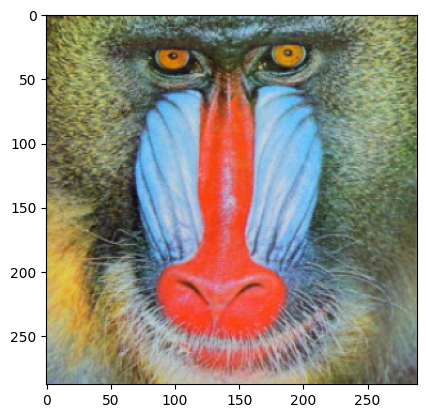

In [99]:
restored_image = cv.merge((r,g,b))
plt.imshow(restored_image);

Dostęp do poszczególnych pikseli odbywa się tak jak w macierzy, czyli podając wiersz i kolumnę. Poniżej możemy zobaczyć zmianę piksela na współrzędnych `(1, 1)`:

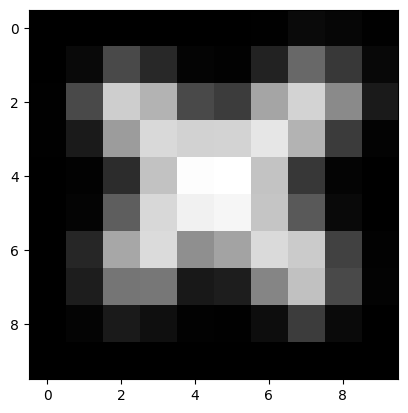

In [100]:
plt.imshow(x_small, cmap = 'gray');

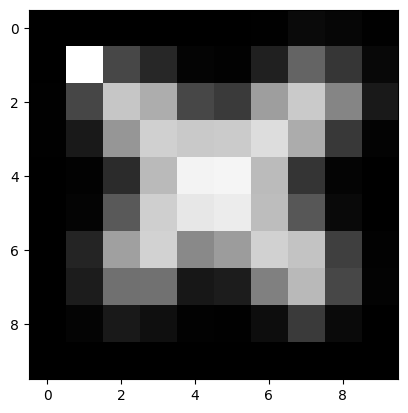

In [101]:
x_small[1, 1] = 255
plt.imshow(x_small, cmap = 'gray');

Przycinanie odbywa się przez znany w Pythonie tzw. *slicing*, czyli wycinki:

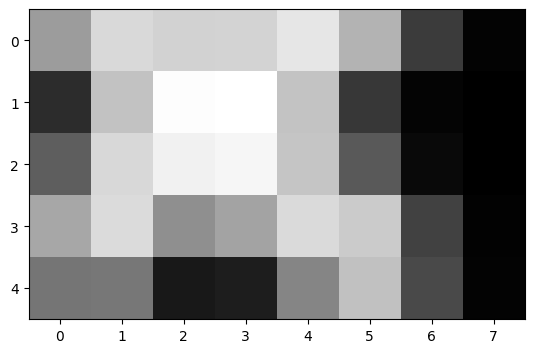

In [102]:
plt.imshow(x_small[3:8, 2:], cmap = 'gray');

Możemy również ustawić kolor dla kilku kanałów jednocześnie dla zadanego regionu. Wykonamy to na kopii obrazu:

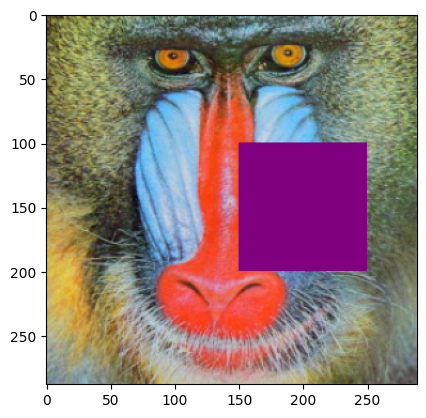

In [103]:
image_edited = image.copy()
image_edited[100:200, 150:250] = (128, 0, 128)
plt.imshow(image_edited[..., ::-1]);

Przeskalowanie obrazu odbywa się przez [`cv.resize()`](https://docs.opencv.org/4.5.3/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d), w której albo podajemy dokładne docelowe wymiary, albo podajemy współczynniki skalowania na osiach *x* i *y*; możemy też uwzględnić odpowiednią metodę interpolacji. Matplotlib nie wyświetli nam wprost powiększonych obrazków, ale będziemy mogli zauważyć zmianę poprzez np. poprzez zmianę zakresów skali osi *x* i *y*:

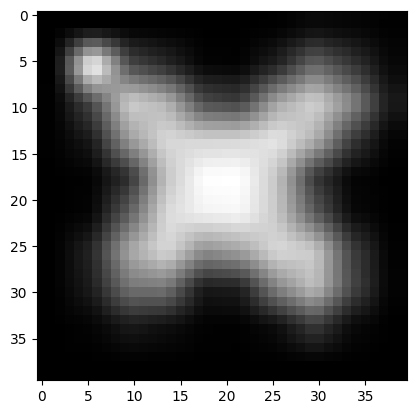

In [104]:
x_small_resized_1 = cv.resize(x_small, (40, 40))
plt.imshow(x_small_resized_1, cmap='gray');

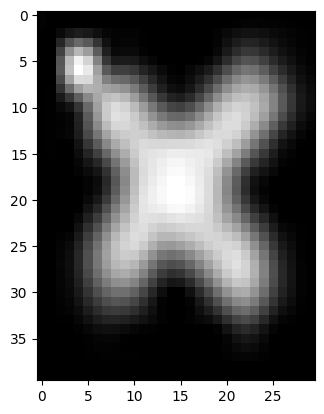

In [105]:
x_small_resized_2 = cv.resize(x_small, None, fx=3, fy=4, interpolation=cv.INTER_CUBIC)
plt.imshow(x_small_resized_2, cmap='gray');

Obrót obrazu dokonywany jest przez funkcję [`cv.flip()`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441), w której podajemy według której osi ma nastąpić obrót (`0`: *x*, `1`: *y*, `-1`: obie).

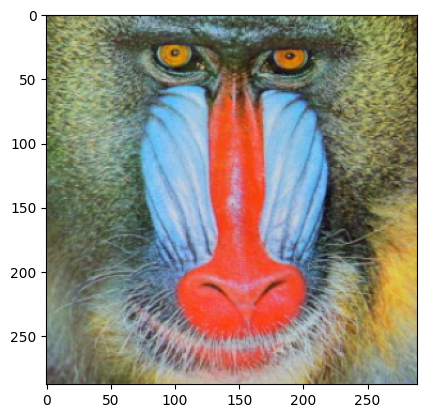

In [106]:
image_flipped = cv.flip(image, 1)
plt.imshow(image_flipped[..., ::-1]);

Może pojawić się potrzeba utworzenia nowych obrazów, więc najczęściej używa się do tego biblioteki NumPy:

In [107]:
import numpy as np

Poniższe wywołania pokazują kilka wariantów. Możemy utworzyć pustą trójwymiarową macierz wypełnioną zerami przy pomocy [`numpy.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html):

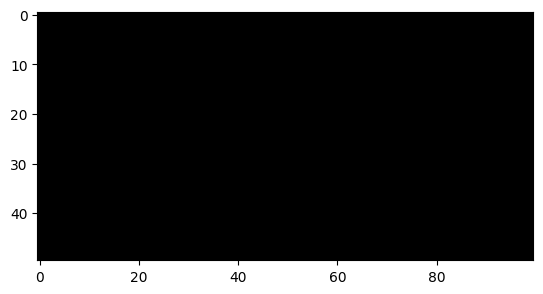

In [108]:
image_empty = np.zeros((50, 100, 3), dtype='uint8')
plt.imshow(image_empty);

Jeżeli chcemy ustawić jakąś początkową wartość, to możemy przeskalować tablicę jedynek uzyskaną z [`numpy.ones()`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html):

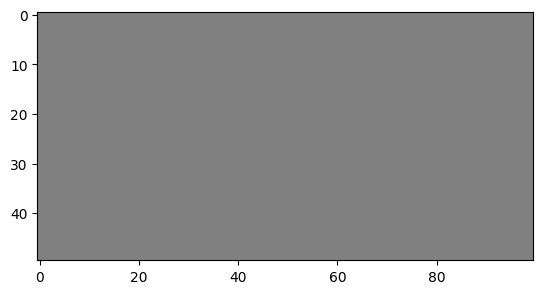

In [109]:
image_empty = 128*np.ones((50, 100, 3), dtype='uint8')
plt.imshow(image_empty)

Jeżeli nowy obraz powinien mieć takie same wymiary jak inny obraz, to możemy do tej operacji użyć [`numpy.ones_like()`](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html):

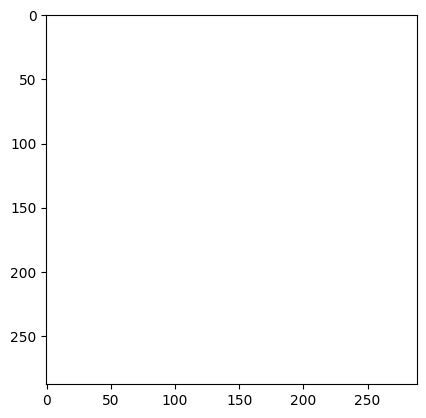

In [110]:
empty_from_other = 255*np.ones_like(image)
plt.imshow(empty_from_other);

Czasami może być przydatne utworzenie maski zawierającej informację o tym czy np. dany piksel zawiera wartość w danym zakresie. Przy pomocy [`cv.inRange()`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981) możemy sprawdzić zakresy dla trzech kanałów; przy okazji możemy zobaczyć jak zgrupować kilka obrazów jednocześnie (por. [`matplotlib.pyplot.subplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)):

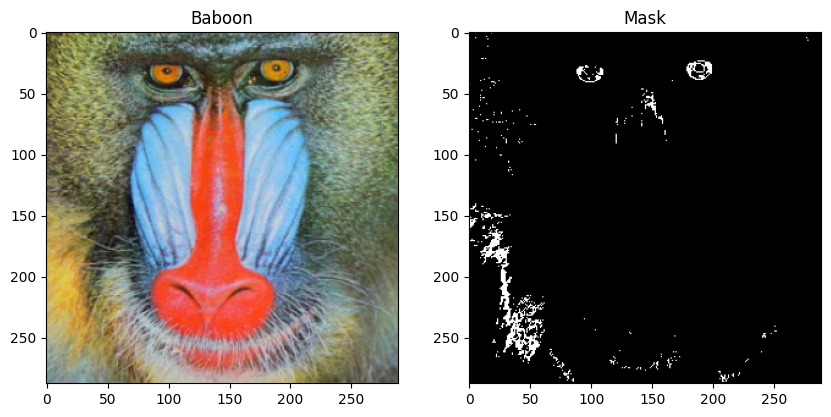

In [111]:
mask = cv.inRange(image, (0,100,150), (100,150,200))

plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(image[..., ::-1])
plt.title("Baboon")
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.title("Mask");

Standardowo operujemy w zakresie liczb całkowitych `[0; 255]`, przez co jeśli w wyniku jakiejś operacji mielibyśmy wykroczyć poza zakres, to skończy się to albo operacją modulo albo np. uzyskaniem wartości ujemnych, co ostatecznie przełoży się na błędny wynik.

Załóżmy, że chcemy podbić kontrast o 50%. Przemnożenie obrazu o wartość 1.5 zwróci nam tablicę o wartościach liczb rzeczywistych:

In [112]:
new_image = image * 1.5
print(new_image.dtype)

float64


W takim wypadku możemy naiwnie spróbować przekonwertować to ponownie do liczb całkowitych, ale wartości powyżej 255 zostaną obliczone według operacji modulo, przez co wynik będzie niezadowalający:

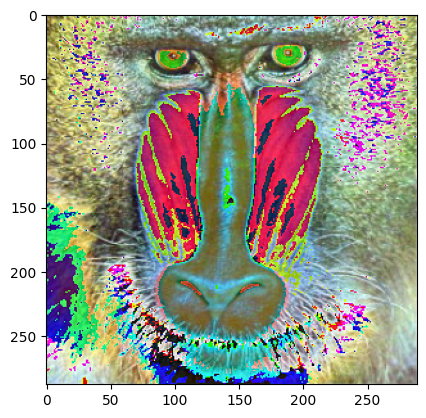

In [113]:
new_image = np.uint8(new_image)
plt.imshow(new_image[..., ::-1]);

Rozwiązaniem jest przycięcie wartości przy użyciu [`numpy.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) do zakresu `[0; 255]` jeśli operujemy na liczbach całkowitych, z ew. znormalizowaniem wartości do zakresu `[0; 1]` jeśli chcemy pracować na liczbach rzeczywistych:

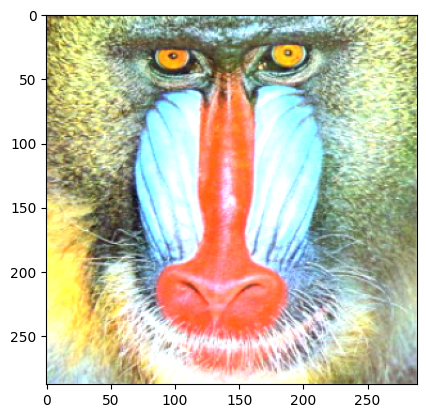

In [114]:
new_image = image * 1.5
clipped_new_image = np.clip(new_image, 0, 255)
clipped_new_image = np.uint8(clipped_new_image)
plt.imshow(clipped_new_image[..., ::-1]);

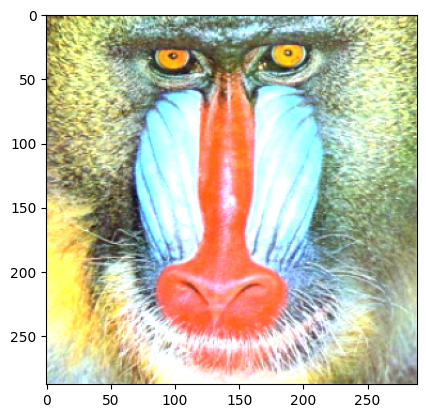

In [115]:
new_image = (image * 1.5)/255
clipped_new_image = np.clip(new_image, 0, 1)
plt.imshow(clipped_new_image[..., ::-1]);

Jeśli zwiększymy jasność i potencjalnie wyjdziemy poza zakres `[0; 255]`, to ponownie wartości zostaną przekręcone:

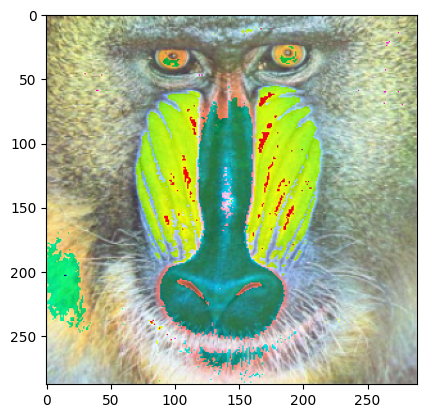

In [116]:
new_image = image + 50
plt.imshow(new_image[..., ::-1]);

Z drugiej strony należy mieć też na uwadze pewne subtelne konwersje, które mogą odbywać się niejawnie. Poniżej mamy operację, która powoduje użycie danych typu `int16`, przez co następuje niejawna konwersja i przycięcie (jest o tym informacja w ostrzeżeniu):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


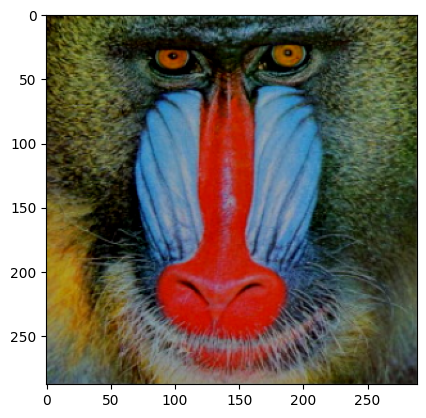

In [117]:
new_image = image + (-50)
plt.imshow(new_image[..., ::-1]);

Rozwiązaniem powyższych problemów może być w przypadku zmiany jasności użycie funkcji [`cv.add()`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6) i [`cv.substract()`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gaa0f00d98b4b5edeaeb7b8333b2de353b), a w przypadku zmiany kontrastu użycie [`cv.multiply()`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#ga979d898a58d7f61c53003e162e7ad89f), konwersja do typu np. `float64` i powrót do `uint8` z przycięciem wartości.

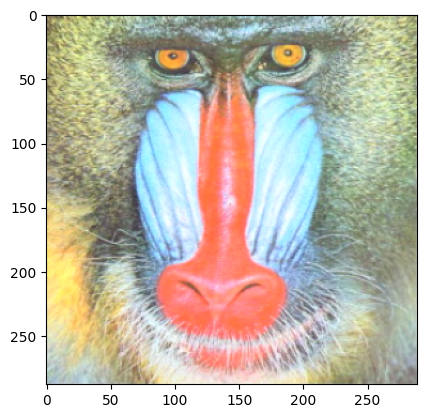

In [118]:
matrix = np.ones(image.shape, dtype='uint8') * 50

image_brighter = cv.add(image, matrix)
plt.imshow(image_brighter[:, :, ::-1]);

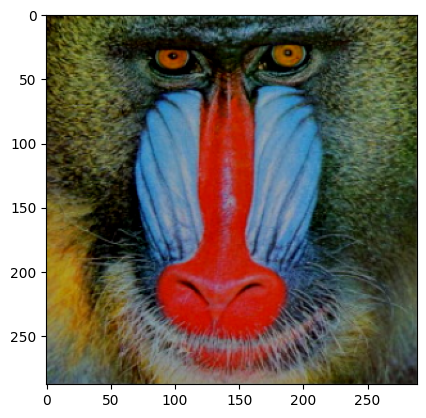

In [119]:
image_darker   = cv.subtract(image, matrix)
plt.imshow(image_darker[:, :, ::-1]);

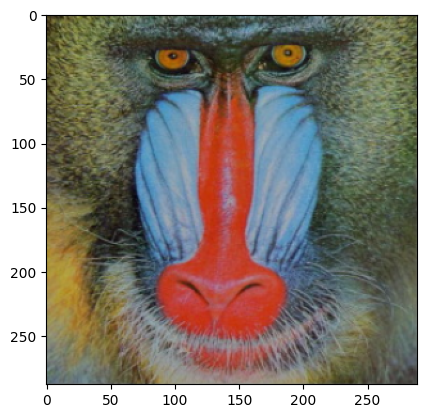

In [120]:
matrix = np.ones(image.shape, dtype = 'float64')

image_lower   = np.uint8(cv.multiply(np.float64(image), matrix, scale = 0.8))
plt.imshow(image_lower[:, :, ::-1]);

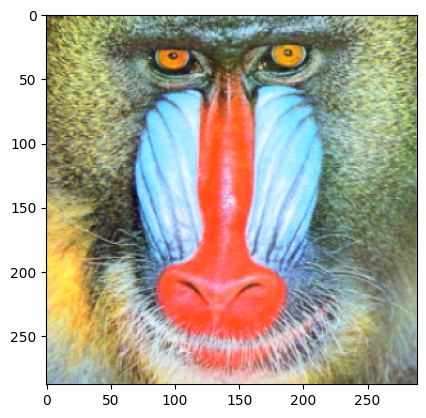

In [121]:
image_higher  = np.uint8(np.clip(cv.multiply(np.float64(image), matrix, scale = 1.2) , 0, 255))
plt.imshow(image_higher[:, :, ::-1]);

## Zapisywanie obrazów

Funkcja [`cv.imwrite()`](https://docs.opencv.org/4.5.3/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) zapisuje obraz do pliku. Pierwszy argument to nazwa pliku, drugi argument to obraz, który chcemy zapisać. Np. poniższe polecenie spowodowałoby zapisanie obrazu w formacie PNG w katalogu roboczym:

```python
cv.imwrite('pawian.png', image)
```

## Anotowanie

Sprawdźmy w jaki sposób do pustego obrazu dodać kilka obiektów geometrycznych. Użyjemy do tego funkcji [`cv.line()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2), [`cv.circle()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) , [`cv.rectangle()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9), [`cv.ellipse()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga28b2267d35786f5f890ca167236cbc69), [`cv.polylines()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#gaa3c25f9fb764b6bef791bf034f6e26f5) i [`cv.putText()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576). Funkcje te będą nadpisywały wejściowy obraz.

W powyższych funkcjach pojawiają się wspólne argumenty:

* `img` - obraz, na którym będziemy umieszczać obiekty,
* `color` - kolor obiektu podany w formacie jako krotka (*tuple*), np. `(255, 0, 0)`; w przypadku obrazów w skali odcieni szarości wystarczy podać wartość skalarną,
* `thickness` - grubość linii, okręgu, itp.; w przypadku wartości `-1` w przypadku zamkniętych figur jak okrąg, obiekt zostanie wypełniony wewnątrz wskazanym kolorem; domyślna wartość to `1`,
* `lineType` : rodzaj linii, np. 8-sąsiedztwo, antyaliasing, itp.; domyślnie jest 8-sąsiedztwo, natomiast wartość [`cv.LINE_AA`](https://docs.opencv.org/4.5.3/d0/de1/group__core.html#ggaf076ef45de481ac96e0ab3dc2c29a777a85fdabe5335c9e6656563dfd7c94fb4f) włącza antyaliasing.

Na początku zaimportujemy bibliotekę NumPy i przy pomocy funkcji [`numpy.zeros()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) utworzymy pusty 3-warstwowy czarny obraz o rozmiarze 512x512.

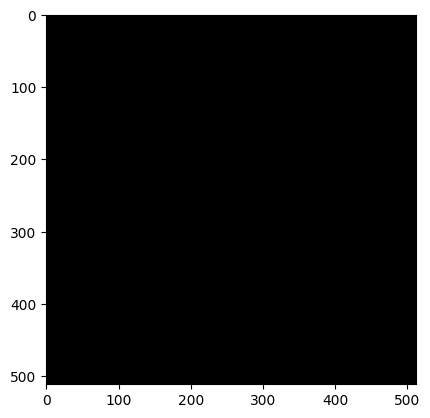

In [122]:
import numpy as np

img = np.zeros((512,512,3), np.uint8)

plt.imshow(img)

W dalszej części operowali na obrazie w formacie RGB.

### Linie

Aby narysować linię, musimy podać początkowe i końcowe współrzędne linii. Przy pomocy [`cv.line()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2) narysujemy na obrazie czerwoną linię od lewego górnego rogu do prawego dolnego rogu o grubości 5 pikseli.

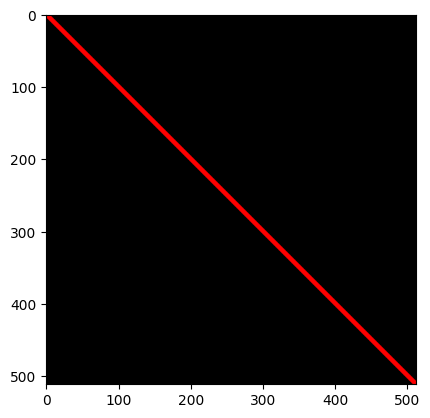

In [123]:
cv.line(img, (0,0), (511,511), (255,0,0), 5)

plt.imshow(img)

### Prostokąty

Aby narysować prostokąt, potrzebujemy lewego górnego rogu i prawego dolnego rogu prostokąta. Tym razem przy pomocy [`cv.rectangle()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9) narysujemy zielony prostokąt w prawym górnym rogu obrazu.

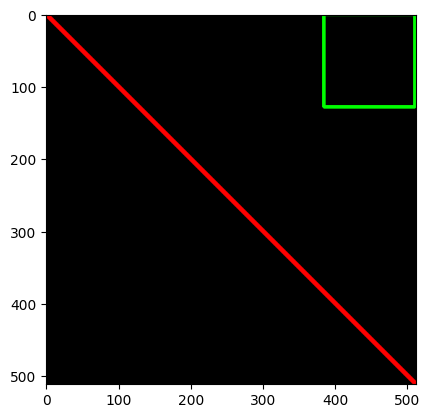

In [124]:
cv.rectangle(img, (384,0), (510,128), (0,255,0), 3)

plt.imshow(img)

### Okręgi

Aby narysować okrąg, potrzebujemy jego współrzędnych środka i promienia. Przy pomocy [`cv.circle()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) narysujemy okrąg wewnątrz prostokąta narysowanego powyżej.

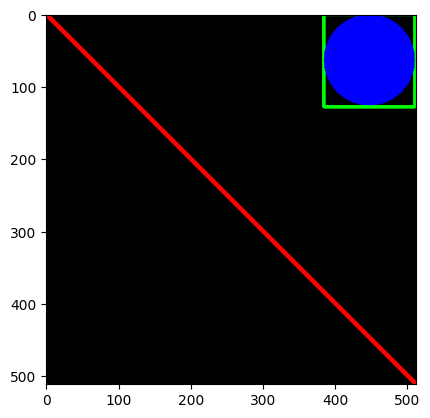

In [125]:
cv.circle(img, (447,63), 63, (0,0,255), -1)

plt.imshow(img)

### Elipsy

Aby narysować elipsę, musimy przekazać kilka argumentów. Jednym argumentem jest położenie środka `(x, y)`. Następnym argumentem jest długość dwóch osi (długość głównej osi i mniejsza długość osi). Kolejny parametr to kąt obrotu elipsy w kierunku przeciwnym do ruchu wskazówek zegara. Kolejne dwa argumenty oznaczają początek i koniec łuku elipsy mierzonego zgodnie z ruchem wskazówek zegara od głównej osi. tj. podanie wartości `0` i `360` daje pełną elipsę. Aby uzyskać więcej informacji, sprawdź dokumentację [`cv.ellipse()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga28b2267d35786f5f890ca167236cbc69). Poniższy kod rysuje pół elipsy na środku obrazu.

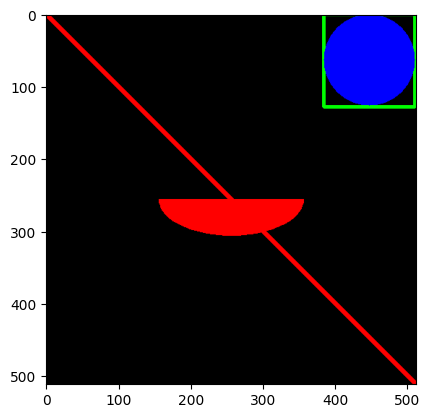

In [126]:
cv.ellipse(img, (256,256), (100,50), 0, 0, 180, 255, -1)

plt.imshow(img)

### Poligony

Aby narysować wielokąt, najpierw potrzebujemy współrzędnych wierzchołków. Ustawmy te punkty w tablicy o wymiarach `liczba_wierszy x 1 x 2`, gdzie `liczba_wierszy` to liczba wierzchołków i powinna być typu `int32`. Tutaj narysujemy mały wielokąt z czterema wierzchołkami w kolorze jasnoniebieskim.

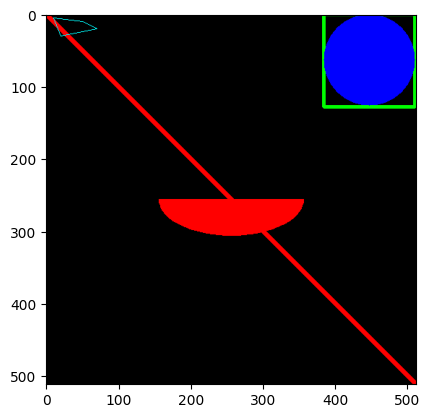

In [127]:
pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.polylines(img, [pts], True, (0,255,255))

plt.imshow(img)

Wielokąt może wydawać się przerywany, ale jeśli powiększylibyśmy wynikowy obraz, to byśmy zobaczyli, że jest on zamknięty.

Jeśli trzecim argumentem [`cv.polylines()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#gaa3c25f9fb764b6bef791bf034f6e26f5) jest `False`, otrzymamy niedomknięty poligon.

Funkcja `cv.polylines()` może być używana do rysowania wielu linii. Wystarczy utworzyć listę wszystkich linii, które chcemy narysować i przekazać je do funkcji. Wszystkie linie zostaną narysowane osobno. Jest to znacznie szybszy sposób na narysowanie grupy linii niż wywołanie osobno [`cv.line()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2) dla każdej linii.

### Tekst

Aby umieścić tekst na obrazie, musimy określić następujące rzeczy:

* dane tekstowe, które chcemy napisać,
* współrzędne miejsca, w którym chcemy umieścić tekst (np. lewy dolny róg, w którym zacznie się tekst),
* typ czcionki (sprawdź dokumentację [`cv.putText()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576) dla obsługiwanych czcionek),
* rozmiar czcionki,
* pozostałe rzeczy takie jak kolor, grubość, typ linii, itp.; dla uzyskania lepszego wynikowego wyglądu zaleca się `lineType = `[`cv.LINE_AA`](https://docs.opencv.org/4.5.3/d0/de1/group__core.html#ggaf076ef45de481ac96e0ab3dc2c29a777a85fdabe5335c9e6656563dfd7c94fb4f).

Na naszym obrazie umieścimy tekst w kolorze białym.

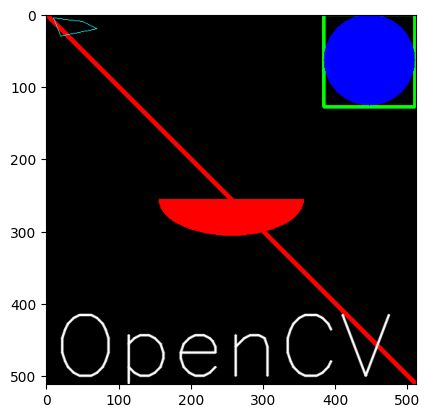

In [128]:
cv.putText(img, 'OpenCV', (10,500), cv.FONT_HERSHEY_SIMPLEX, 4, (255,255,255), 2, cv.LINE_AA)

plt.imshow(img)

Czasami potrzebujemy jednak dokładnych informacji o wynikowym tekście, tak aby np. odpowiednio go umiejscowić lub umieścić pod nim kontrastowe tło. Do uzyskania tych informacji pomocne są funkcje [`cv.getTextSize()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga3d2abfcb995fd2db908c8288199dba82) i [`cv.getFontScaleFromHeight()`](https://docs.opencv.org/4.5.3/d6/d6e/group__imgproc__draw.html#ga442ff925c1a957794a1309e0ed3ba2c3).

## Wyświetlanie obrazów poza Jupyterem

### HighGUI

W OpenCV obraz standardowo wyświetla się przy pomocy modułu HighGUI. Przy użyciu funkcji [`cv.imshow()`](https://docs.opencv.org/4.5.3/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) możemy wyświetlić obraz w oknie. Okno automatycznie dopasowuje się do rozmiaru obrazu.

Pierwszy argument to nazwa okna. Drugi argument to nasz obraz. Możemy utworzyć dowolną liczbę okien, ale z różnymi nazwami okien.

```python
cv.imshow('image', image)
cv.waitKey(0)
```

Pod Windowsem wyświetli nam się wskazany przez nas obraz, natomiast pod Linuxem mechanizm HighGUI przy wyświetlaniu obrazu udostępnia trochę więcej opcji i informacji o wyświetlanym obrazie.

![Obraz pawiana wyświetlony przy pomocy HighGUI](img/highgui-baboon.png)

Zwróćmy uwagę, że obraz pojawia się dopiero po poleceniu `cv.waitKey(0)` oraz będzie oczekiwał na wciśnięcie klawisza.

[`cv.waitKey()`](https://docs.opencv.org/4.5.3/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) jest funkcją związaną z klawiaturą. Jej argumentem jest czas w milisekundach. Funkcja czeka przez określony czas na każde zdarzenie klawiatury. Jeśli w tym czasie zostanie naciśnięty dowolny klawisz, program przejdzie do dalszych operacji. Jeśli jako argument zostanie przekazane 0, to funkcja czeka bez końca na uderzenie klawisza klawiatury. Można również ustawić wykrywanie konkretnych klawiszy, takich jak naciśnięcie klawisza `<A>`, itp. Poza przetwarzaniem zdarzeń klawiatury, ta funkcja przetwarza również wiele innych zdarzeń GUI, więc **musisz** użyć jej przy wyświetleniu obrazu.

Klikając na obraz i wciskając `<Enter>`, konsola zwróci informację liczbową o wciśniętym klawiszu, a ponadto obsługa programu wróci z powrotem do konsoli. Wydając poniższe polecenie usuniemy wszystkie okna:

```python
cv.destroyAllWindows()
```

[`cv.destroyAllWindows()`](https://docs.opencv.org/4.5.3/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481) usuwa wszystkie utworzone przez nas okna, a jeśli chcemy usunąć konkretne okno, należy użyć funkcji [`cv.destroyWindow()`](https://docs.opencv.org/4.5.3/d7/dfc/group__highgui.html#ga851ccdd6961022d1d5b4c4f255dbab34), w której jako argument podajemy dokładną nazwę okna.

Istnieje specjalny przypadek, w którym możemy utworzyć okno i później załadować do niego obraz. W takim przypadku określamy czy rozmiar okna jest zmienny, czy nie. Robi się to za pomocą funkcji [`cv.namedWindow()`](https://docs.opencv.org/4.5.3/d7/dfc/group__highgui.html#ga5afdf8410934fd099df85c75b2e0888b). Domyślna flaga to [`cv.WINDOW_AUTOSIZE`](https://docs.opencv.org/4.5.3/d7/dfc/group__highgui.html#ggabf7d2c5625bc59ac130287f925557ac3acf621ace7a54954cbac01df27e47228f), ale jeśli określimy flagę jako [`cv.WINDOW_NORMAL`](https://docs.opencv.org/4.5.3/d7/dfc/group__highgui.html#ggabf7d2c5625bc59ac130287f925557ac3a29e45c5af696f73ce5e153601e5ca0f1), to możemy zmienić rozmiar okna. Będzie to pomocne, gdy obraz jest zbyt duży:

```python
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.imshow('image', image)
cv.waitKey(0)
cv.destroyAllWindows()
```

Interfejs HighGUI czasami pomaga w debugowaniu, ale trzeba mieć też świadomość, że nie jest on specjalnie rozbudowany i zasadniczo nie służy do budowania zaawansowanych interfejsów graficznych. HighGUI obsługuje sygnały idące nie tylko z klawiatury, ale również myszy, a ponadto pozawala na umieszczenie np. sliderów. Krótkie przykłady znajdują się w samouczkach opisujących [`cv.setMouseCallback()`](https://docs.opencv.org/4.5.3/db/d5b/tutorial_py_mouse_handling.html) oraz [`cv.getTrackbarPos()` i `cv.createTrackbar()`](https://docs.opencv.org/4.5.3/d9/dc8/tutorial_py_trackbar.html).

### Matplotlib

Po przekonwertowaniu obrazu do formatu RGB wyświetlamy go przy pomocy `pyplot`. Używamy przy tym funkcji [`matplotlib.pyplot.imshow()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) oraz [`matplotlib.pyplot.show()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show):

```python
plt.imshow(image2)
plt.show()
```

Funkcja [`matplotlib.pyplot.show()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show) posiada opcjonalny argument `block` (domyślna wartość `True`), która kontroluje czy funkcja jest blokująca:

```python
plt.imshow(image2)
plt.show(False)
```

lub krócej:

```python
plt.imshow(image2)
plt.show(0)
```

**Uwaga**: jeżeli w skrypcie ustawimy argument `block` na `False`, to po uruchomieniu skryptu najprawdopodobniej nie zobaczymy wynikowego obrazu/diagramu, ponieważ skrypt zacznie wykonywać dalsze polecenia i np. zakończy działanie programu. Ustawienie argumentu `block` na `False` najlepiej sprawdza się podczas pracy/eksperymentowania w konsoli interpretera Pythona.

## Moduły

[Lista modułów OpenCV](https://docs.opencv.org/4.5.3/) jest dość długa i zawiera pakiety algorytmów m.in. dla przetwarzania obrazów, uczenia maszynowego, głębokich sieci neuronowych, fotografii obliczeniowej, dedykowane rozwiązania dla CUDA, przepływ optyczny, operacje dla obrazów w logice rozmytej, przetwarzania RGB-D i wiele, wiele innych. Z poziomu Pythona dostęp do poszczególnych algorytmów odbywa się bezpośrednio przez moduł `cv2` (u nas alias `cv`). Część klas i funkcji ma przedrostek oznaczający moduł, np. `cv.bgsegm_BackgroundSubtractorCNT(...)` oznacza klasę [BackgroundSubtractorCNT](https://docs.opencv.org/4.5.3/de/dca/classcv_1_1bgsegm_1_1BackgroundSubtractorCNT.html) z modułu [bgsegm](https://docs.opencv.org/4.5.3/df/d5d/namespacecv_1_1bgsegm.html) zawierającym udoskonalone metody segmentacji pomiędzy tłem a pierwszym planem.

## Ćwiczenie 1

Wczytaj plik [`img/soyjaks.jpg`](https://knowyourmeme.com/memes/two-soyjaks-pointing) i spróbuj odtworzyć poniższy obrazek.

In [129]:
# miejsce na eksperymenty
imagecw = cv.imread("img/soyjaks.jpg", cv.IMREAD_UNCHANGED)

In [130]:
imagecw2 = cv.cvtColor(imagecw, cv.COLOR_BGR2RGB)

# scale_percent = 220 # percent of original size
# width = int(imagecw2.shape[1] * scale_percent / 100)
# height = int(imagecw2.shape[0] * scale_percent / 100)
# dim = (width, height)
#   
# # resize image
# resized = cv.resize(imagecw2, dim, interpolation = cv.INTER_AREA)

In [131]:
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

# display_image_in_actual_size("img/soyjaks.jpg")

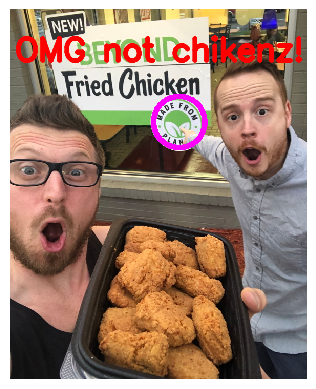

In [132]:
cv.circle(imagecw2, (330,220), 50, (255,0,255), 10)
cv.putText(imagecw2, 'OMG not chikenz!', (10,100), cv.FONT_HERSHEY_SIMPLEX, 2.05, (255,0,0), 8, cv.LINE_AA)
plt.axis('off')
# plt.imshow(imagecw2, aspect='auto')
plt.imshow(imagecw2, interpolation='nearest')

![Two Soyjaks Pointing](img/soyjaks-final.png)

## Ćwiczenie 2

Załaduj obrazy `img/pipe.png` oraz `img/man-without-pipe.png` i wykonaj operacje tak, aby uzyskać poniższy obraz.

In [133]:
# def scale_img(img, percent):
#     scale_percent = percent # percent of original size
#     width = int(img.shape[1] * scale_percent / 100)
#     height = int(img.shape[0] * scale_percent / 100)
#     dim = (width, height)
#     
#     # resize image
#     resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
#     
#     print('Resized Dimensions : ',resized.shape)
#     
#     return resized

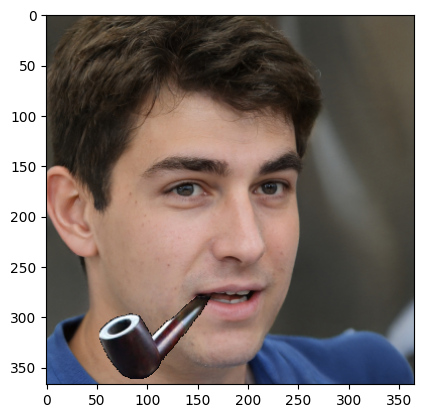

In [140]:
# miejsce na eksperymenty
from sklearn import pipeline

# imagecw2 = cv.cvtColor(imagecw, cv.COLOR_BGR2RGB)

pipe = cv.imread("img/pipe.png", cv.IMREAD_UNCHANGED)

man_original = cv.imread("img/man-without-pipe.png", cv.IMREAD_UNCHANGED)
man_no_pipe = cv.cvtColor(man_original, cv.COLOR_BGR2RGB)
# rgba = cv.cvtColor(man_no_pipe, cv.COLOR_RGB2RGBA)

pipe = cv.cvtColor(pipe, cv.COLOR_BGR2RGB)
scale_percent = 60 # percent of original size
width = int(pipe.shape[1] * scale_percent / 100)
height = int(pipe.shape[0] * scale_percent / 100)
dim = (width, height)

pipe = cv.flip(pipe, 1)
pipe = cv.resize(pipe, dim, interpolation = cv.INTER_AREA)


x_start, y_start = 280, 53
x_max = pipe.shape[0]
y_max = pipe.shape[1]

for x in range(0, x_max):
    for y in range(0, y_max):
        if (pipe[x][y][0] != 0 and pipe[x][y][1] != 0 and pipe[x][y][2] != 0):
            man_no_pipe[x + x_start][y + y_start] = pipe[x][y]

plt.imshow(man_no_pipe, cmap='gray')
# print(rgba)


![Człowiek z fajką](img/man-with-pipe.png)

In [135]:
print(man_no_pipe.shape)

(367, 365, 3)


In [136]:
print(pipe_flipped.shape)

(82, 112, 3)


## Co dalej?

Przygotuj środowisko pracy instalując wygodne dla Ciebie IDE, np. [PyCharm](https://www.jetbrains.com/pycharm/) (są darmowe studenckie licencje), [Visual Studio](https://visualstudio.microsoft.com) z dodatkiem [Python Tools](https://microsoft.github.io/PTVS/) lub [Visual Studio Code](https://code.visualstudio.com/). Sprawdź czy możesz zaimportować OpenCV, ew. stwórz wirtualne środowisko i doinstaluj niezbędne paczki.

----

Źródło:

* OpenCV, [Getting Started with Images](https://docs.opencv.org/4.5.3/dc/d2e/tutorial_py_image_display.html).
* OpenCV, [Drawing Functions in OpenCV](https://docs.opencv.org/4.5.3/dc/da5/tutorial_py_drawing_functions.html).
* P. Pandey, [Face Detection with Python using OpenCV](https://www.datacamp.com/community/tutorials/face-detection-python-opencv).